Test Loader.

Simple utility to verify images.

Usage.

Please note the steps are for a windows computer, not linux environment, since the computer with GPU capabilities is using Windows.

1. Usage, please install VsCode and the Jupyter plugin. 
2. Make sure you have install virtual environment, if not, please execute: !pip install virtualenv
3. Once installed, press Ctrl+Shift+P , select Venv , and create a virtual environment. 
 


In [1]:
# If it's the first time, please uncomment the following line and a warning pop up window is going to appear, click on install for ipykernel package
# If for the first time it will take a lot of minutes.
# !pip install -r requirements.txt

### Get sizes of folders/images

In [2]:
from pathlib import Path
import os

def load_files(folder_route: str):
    dir_path = Path(folder_route)
    folderContent = [os.path.join(dir_path, fn) for fn in next(os.walk(dir_path))[2]]
    return folderContent


TRAIN_IMAGE_DIR = './dataset/train/images/'
TRAIN_MASK_DIR = './dataset/train/masks/'

TEST_IMAGE_DIR = './dataset/test/images/'
TEST_MASK_DIR = './dataset/test/masks/'

folder_train_image_content = load_files(TRAIN_IMAGE_DIR)
folder_train_mask_content = load_files(TRAIN_MASK_DIR)
folder_test_image_content = load_files(TEST_IMAGE_DIR)
folder_test_mask_content = load_files(TEST_MASK_DIR)




print('Path: train/images, size: ',len(folder_train_image_content))
print('Path: train/masks, size: ',len(folder_train_mask_content))
print('Path: test/images, size: ',len(folder_test_image_content))
print('Path: test/masks, size: ',len(folder_test_image_content))


Path: train/images, size:  103
Path: train/masks, size:  103
Path: test/images, size:  10
Path: test/masks, size:  10


### Sample visualization of images

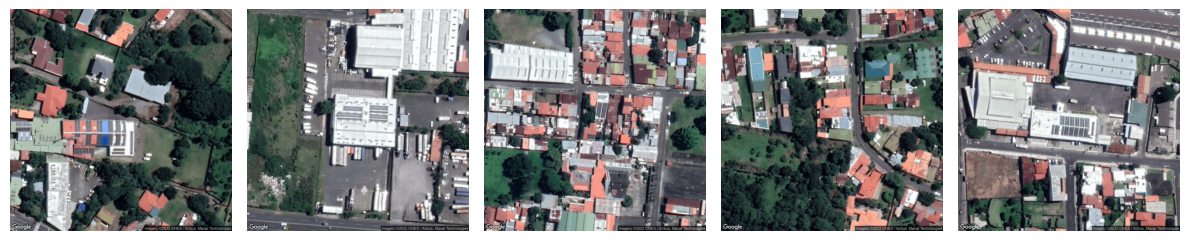

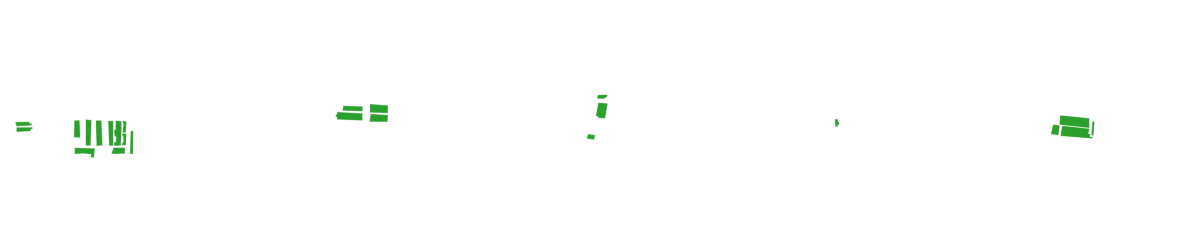

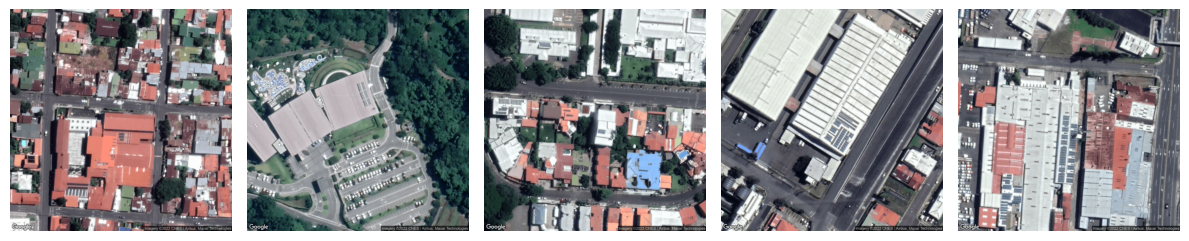

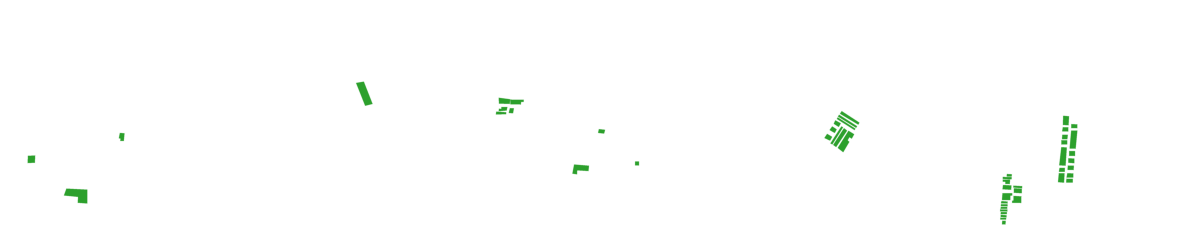

In [3]:
import matplotlib.pyplot as plt
import cv2

def display_image_grid(images_filepaths,cols=5):
    rows = len(images_filepaths) // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, image_filepath in enumerate(images_filepaths):
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()
display_image_grid(folder_train_image_content[1:6])
display_image_grid(folder_train_mask_content[1:6])
display_image_grid(folder_test_image_content[1:6])
display_image_grid(folder_test_mask_content[1:6])


### Data loaders and transformations. 

#### Early transformations decided for segmentation mode.

In [5]:
from scripts.data_loader import load_and_transform

train_loader, val_loader, train_ds, train_val_ds, test_loader = load_and_transform(TRAIN_IMAGE_DIR,
 TRAIN_MASK_DIR,TEST_IMAGE_DIR, TEST_MASK_DIR)


#### Visualize transformations, created using albumentations

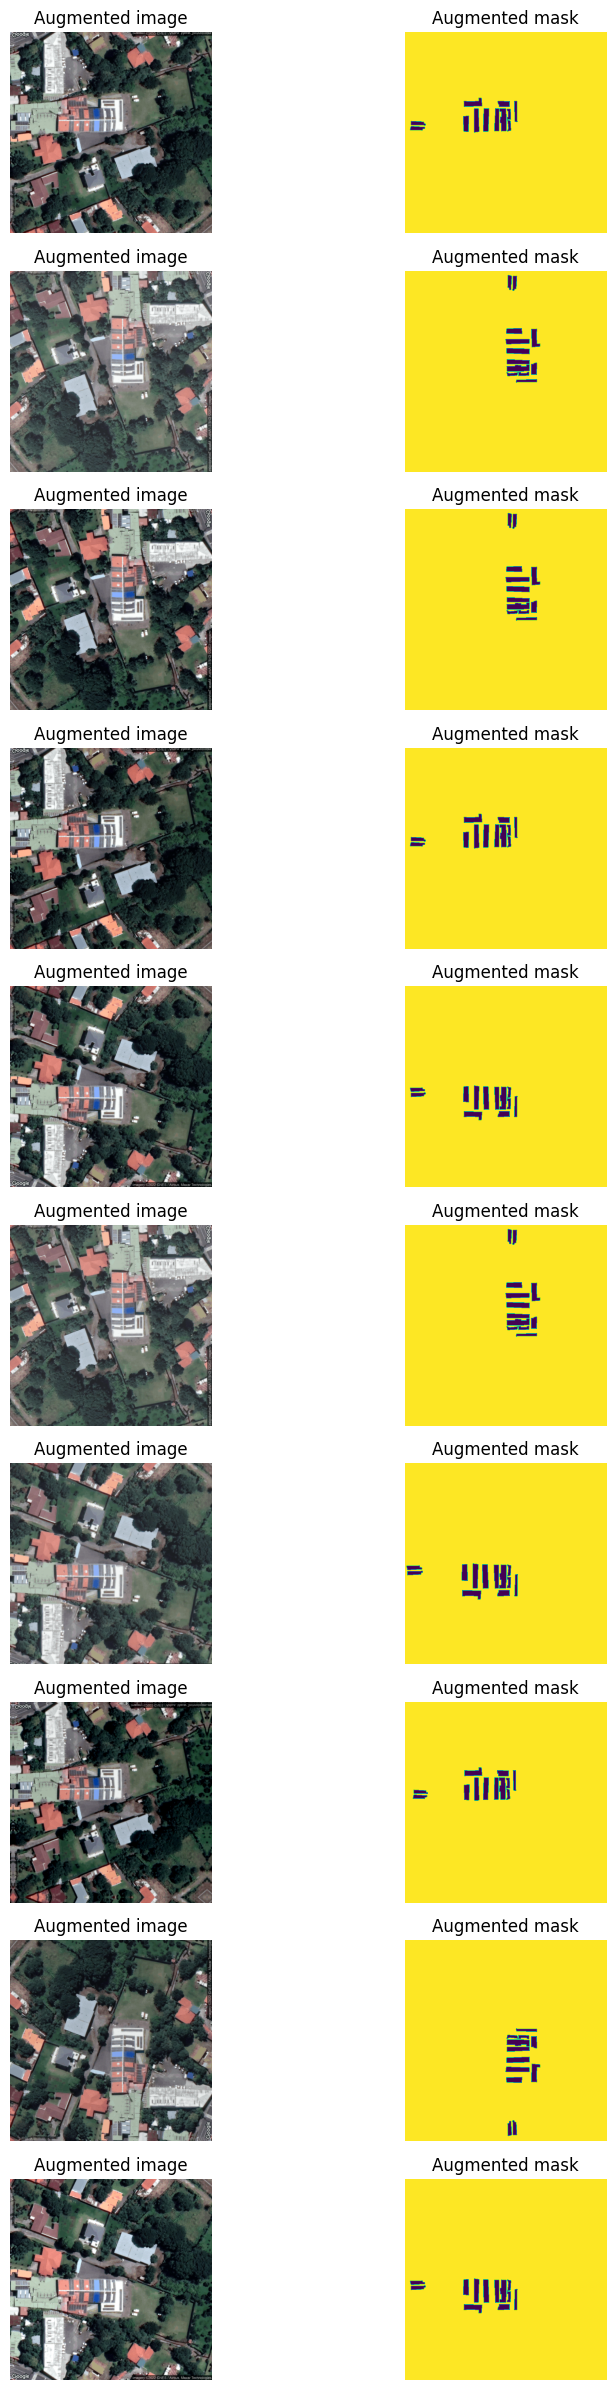

In [6]:
import matplotlib.image as mpimg
import numpy as np
from albumentations.pytorch import ToTensorV2
import albumentations as A  

def visualize_augmentations(dataset, idx=0, samples=5):
    # dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform 
    if not isinstance(t, ( ToTensorV2))])
    figure, ax = plt.subplots(nrows=samples, ncols=2, figsize=(10, 24))

    for i in range(samples):
        batch = dataset[idx]
        ax[i, 0].imshow(batch['image'])
        ax[i, 1].imshow(np.squeeze(batch['mask']))
        ax[i, 0].set_title("Augmented image")
        ax[i, 1].set_title("Augmented mask")
        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
    plt.tight_layout()
    plt.show()

visualize_augmentations(train_ds, idx=1, samples=10)